# 🤖 Notebook: model_training.ipynb

**Goal:** Train and evaluate a Linear Regression baseline.

### Include
- Load `data/cleaned_pulsebat.csv`
- Train/test split
- Fit `LinearRegression`
- Metrics: R², MSE, MAE
- Plot: Predicted vs Actual SOH
- Save model to `models/soh_linear_model.pkl` (joblib)

### Deliverable
- Saved model + performance plots


In [3]:
# Task 1 – Train Linear Regression Model
# --------------------------------------
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import joblib

# --- Resolve paths whether running from project root or /notebooks ---
if os.path.basename(os.getcwd()) == "notebooks":
    DATA_PATH = "../data/cleaned_pulsebat.csv"
    MODEL_DIR = "../models"
else:
    DATA_PATH = "data/cleaned_pulsebat.csv"
    MODEL_DIR = "models"

print("Loading data from:", DATA_PATH)

# 1) Load cleaned dataset
df = pd.read_csv(DATA_PATH)

# 2) Separate features (U1–U21) and target (SOH)
feature_cols = [f"U{i}" for i in range(1, 22)]
target_col = "SOH"

X = df[feature_cols].values
y = df[target_col].values

# 3) Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Shapes → X_train: {X_train.shape}, X_test: {X_test.shape}, "
      f"y_train: {y_train.shape}, y_test: {y_test.shape}")

# 4) Train Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

print("✅ Model trained.")
print("Intercept:", model.intercept_)
print("Coefficients (len):", len(model.coef_))

# 5) (Optional here) Save the trained model for later steps
os.makedirs(MODEL_DIR, exist_ok=True)
model_path = os.path.join(MODEL_DIR, "soh_linear_model.pkl")
joblib.dump(model, model_path)
print(f"💾 Saved model → {model_path}")


Loading data from: ../data/cleaned_pulsebat.csv
Shapes → X_train: (536, 21), X_test: (134, 21), y_train: (536,), y_test: (134,)
✅ Model trained.
Intercept: 4.863921407176073
Coefficients (len): 21
💾 Saved model → ../models\soh_linear_model.pkl


In [4]:
# Task 2 - Compute R², MSE, and MAE
# --------------------------------------

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import pandas as pd
import joblib
import os

# --- Load trained model if not in memory ---
if "model" not in locals():
    model_path = "../models/soh_linear_model.pkl"
    model = joblib.load(model_path)
    print(f"🔁 Loaded model from {model_path}")

# --- Ensure X_test and y_test exist (if running in a new session) ---
if "X_test" not in locals() or "y_test" not in locals():
    df = pd.read_csv("../data/cleaned_pulsebat.csv")
    feature_cols = [f"U{i}" for i in range(1, 22)]
    target_col = "SOH"
    X = df[feature_cols].values
    y = df[target_col].values

    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

# --- Step 1: Predict test data ---
y_pred = model.predict(X_test)

# --- Step 2: Calculate evaluation metrics ---
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# --- Step 3: Print results ---
print("======================================")
print("📈 Model Evaluation Metrics")
print("======================================")
print(f"R² Score (Accuracy):       {r2:.4f}")
print(f"Mean Squared Error (MSE):  {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print("======================================\n")

# --- Step 4: Create results table ---
evaluation_table = pd.DataFrame({
    "Metric": ["R² Score", "Mean Squared Error", "Mean Absolute Error"],
    "Value": [r2, mse, mae]
})

from IPython.display import display
display(evaluation_table)

# --- Step 5: Save metrics ---
os.makedirs("../data", exist_ok=True)
evaluation_table.to_csv("../data/model_evaluation_results.csv", index=False)
print("✅ Evaluation metrics saved to '../data/model_evaluation_results.csv'")


📈 Model Evaluation Metrics
R² Score (Accuracy):       0.6561
Mean Squared Error (MSE):  0.0015
Mean Absolute Error (MAE): 0.0303



,Metric,Value
0,R² Score,0.656088
1,Mean Squared Error,0.001498
2,Mean Absolute Error,0.030275


✅ Evaluation metrics saved to '../data/model_evaluation_results.csv'


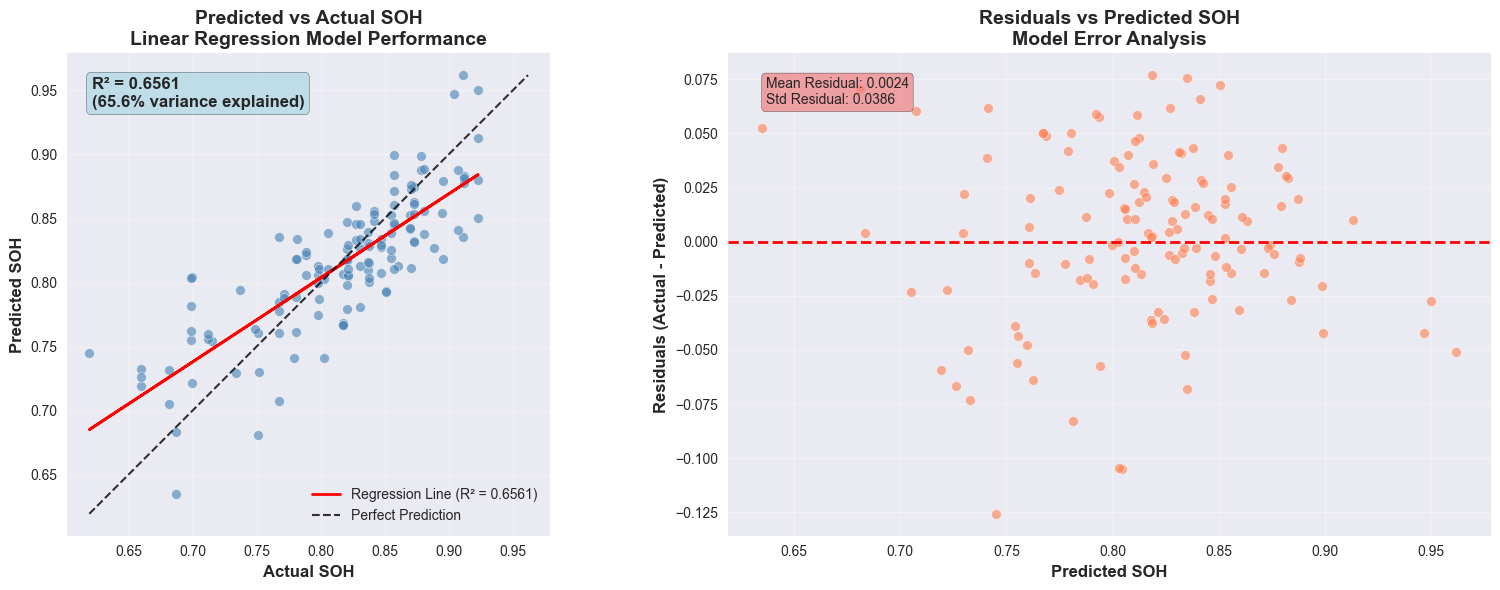

Performance Analysis
R² Score:                    0.6561 (65.6%)
Correlation Coefficient:     0.8108
Mean Absolute Error:         0.0303
Root Mean Square Error:      0.0387
Max Positive Error:          0.0769
Max Negative Error:          -0.1256


In [5]:
# Task 3 - Predicted vs Actual SOH Visualization
# ------------------------------------------------

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
from scipy import stats
import seaborn as sns

# Set style for plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Create figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# --- Plot 1: Scatter Plot with Regression Line ---
ax1.scatter(y_test, y_pred, alpha=0.6, s=50, color='steelblue', edgecolors='white', linewidth=0.5)

# Calculate regression line
slope, intercept, r_value, p_value, std_err = stats.linregress(y_test, y_pred)
line = slope * y_test + intercept

# Plot regression line
ax1.plot(y_test, line, 'r-', linewidth=2, label=f'Regression Line (R² = {r2:.4f})')

# Perfect prediction line (y = x)
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
ax1.plot([min_val, max_val], [min_val, max_val], 'k--', alpha=0.8, linewidth=1.5, label='Perfect Prediction')

# Customize plot
ax1.set_xlabel('Actual SOH', fontsize=12, fontweight='bold')
ax1.set_ylabel('Predicted SOH', fontsize=12, fontweight='bold')
ax1.set_title('Predicted vs Actual SOH\nLinear Regression Model Performance', fontsize=14, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)

# Add R² annotation
ax1.text(0.05, 0.95, f'R² = {r2:.4f}\n({r2*100:.1f}% variance explained)', 
         transform=ax1.transAxes, fontsize=12, fontweight='bold',
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.7),
         verticalalignment='top')

# Set equal aspect ratio for better visualization
ax1.set_aspect('equal', adjustable='box')

# --- Plot 2: Residuals Analysis ---
residuals = y_test - y_pred
ax2.scatter(y_pred, residuals, alpha=0.6, s=50, color='coral', edgecolors='white', linewidth=0.5)
ax2.axhline(y=0, color='red', linestyle='--', linewidth=2)
ax2.set_xlabel('Predicted SOH', fontsize=12, fontweight='bold')
ax2.set_ylabel('Residuals (Actual - Predicted)', fontsize=12, fontweight='bold')
ax2.set_title('Residuals vs Predicted SOH\nModel Error Analysis', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)

# Add residual statistics
residual_mean = residuals.mean()
residual_std = residuals.std()
ax2.text(0.05, 0.95, f'Mean Residual: {residual_mean:.4f}\nStd Residual: {residual_std:.4f}', 
         transform=ax2.transAxes, fontsize=10,
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightcoral", alpha=0.7),
         verticalalignment='top')

plt.tight_layout()
plt.show()

# --- Performance Metrics ---
print("Performance Analysis")
print("=" * 50)
print(f"R² Score:                    {r2:.4f} ({r2*100:.1f}%)")
print(f"Correlation Coefficient:     {np.corrcoef(y_test, y_pred)[0,1]:.4f}")
print(f"Mean Absolute Error:         {np.mean(np.abs(residuals)):.4f}")
print(f"Root Mean Square Error:      {np.sqrt(np.mean(residuals**2)):.4f}")
print(f"Max Positive Error:          {residuals.max():.4f}")
print(f"Max Negative Error:          {residuals.min():.4f}")
print("=" * 50)